# **ABSTRACT**
 Zomato is one of the best online food delivery apps which gives the users the ratings and the reviews on restaurants all over india.These ratings and the Reviews are considered as one of the most important deciding factors which determine how good a restaurant is.

 We will therefore use the real time Data set with variuos features a user would look into regarding a restaurant. We will be considering Banglore City in this analysis.

 Content The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world.

 With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.

 With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food. If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian. These kind of analysis can be done using the data, by studying the factors such as

 • Location of the restaurant
 • Approx Price of food
 • Theme based restaurant or not
 • Which locality of that city serves that cuisines with maximum number of restaurants
 • The needs of people who are striving to get the best cuisine of the neighborhood
 • Is a particular neighborhood famous for its own kind of food.

 “Just so that you have a good meal the next time you step out”

 The data is accurate to that available on the zomato website until 15 March 2019. The data was scraped from Zomato in two phase. After going through the structure of the website I found that for each neighborhood there are 6-7 category of restaurants viz. Buffet, Cafes, Delivery, Desserts, Dine-out, Drinks & nightlife, Pubs and bars.

 Phase I,

 In Phase I of extraction only the URL, name and address of the restaurant were extracted which were visible on the front page. The URl's for each of the restaurants on the zomato were recorded in the csv file so that later the data can be extracted individually for each restaurant. This made the extraction process easier and reduced the extra load on my machine. The data for each neighborhood and each category can be found here

 Phase II,
 In Phase II the recorded data for each restaurant and each category was read and data for each restaurant was scraped individually. 15 variables were scraped in this phase. For each of the neighborhood and for each category their onlineorder, booktable, rate, votes, phone, location, resttype, dishliked, cuisines, approxcost(for two people), reviewslist, menu_item was extracted. See section 5 for more details about the variables.

 Acknowledgements The data scraped was entirely for educational purposes only. Note that I don’t claim any copyright for the data. All copyrights for the data is owned by Zomato Media Pvt. Ltd..

### Main Objective:Recommend Restaurants according to review of the restaurant 

**Columns description**
- url </B> contains the url of the restaurant in the zomato website

- address contains the address of the restaurant in Bengaluru

- name contains the name of the restaurant

- online_order whether online ordering is available in the restaurant or not

- book_table table book option available or not

- rate contains the overall rating of the restaurant out of 5

- votes contains total number of rating for the restaurant as of the above mentioned date

- phone contains the phone number of the restaurant

- location contains the neighborhood in which the restaurant is located

- rest_type restaurant type

- dish_liked dishes people liked in the restaurant

- cuisines food styles, separated by comma

- approx_cost(for two people) contains the approximate cost of meal for two people

- reviews_list list of tuples containing reviews for the restaurant, each tuple

- menu_item contains list of menus available in the restaurant

- listed_in(type) type of meal

- listed_in(city) contains the neighborhood in which the restaurant is listed

#### I will start the task of Restaurant Recommendation System  by importing the necessary Python Libarry

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Now, I will load and read the dataset

In [4]:
data=pd.read_csv("/content/zomato_cleaned4.csv")
data.head()

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
data.shape

(5000, 17)

Now the next step is data cleaning and feature engineering for this step we need to do a lot of stuff with the data such as:
1. Deleting Unnecessary Columns
2. Removing the Duplicates
3. Remove the NaN values from the dataset
4. Changing the column names
5. Data Transformations
6. Data Cleaning
 
 Now, let’s perform all the above steps in our data:


In [7]:
# 1.Deleting unnecessary columns
zomato=data.drop(["url",'dish_liked','phone'],axis=1)
zomato

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,"Level 2, Concorde Block, UB City, Vittal Malya...",BBQ'D - Global Grill & Brewery,No,No,4.3 /5,471,Lavelle Road,"Casual Dining, Microbrewery","BBQ, North Indian","1,500","[('Rated 4.0', 'RATED\n Yet another live barb...",[],Buffet,Brigade Road
4996,"The Ritz-Carlton, 99, Residency Road, Bangalore",The Market - The Ritz-Carlton,No,Yes,4.3 /5,622,Residency Road,Fine Dining,"North Indian, European, Thai","3,400","[('Rated 4.0', 'RATED\n Had breakfast at the ...",[],Buffet,Brigade Road
4997,"WelcomHotel Bengaluru, 46, Richmond Road, Bang...",WelcomCafe Jacaranda - WelcomHotel Bengaluru,No,No,3.9 /5,53,Richmond Road,Fine Dining,"Asian, Continental, North Indian","2,000","[('Rated 5.0', 'RATED\n Hey folks, its as bea...",[],Buffet,Brigade Road
4998,"2/4, Langford Garden Road, Richmond Road, Bang...",Season - Adarsh Hamilton,No,Yes,4.3 /5,334,Richmond Road,Casual Dining,"North Indian, Chinese, South Indian, Continental","1,200","[('Rated 4.0', 'RATED\n This has been our go ...",[],Buffet,Brigade Road


In [8]:
# 2.Removing the duplicates
zomato.duplicated().sum()

1

In [9]:
zomato.drop_duplicates(inplace=True)

In [10]:
zomato.shape

(4999, 14)

In [11]:
# 3.Check and Remove null values from dataset
print(zomato.isnull().sum())
zomato.dropna(how='any',inplace=True)

address                          0
name                             0
online_order                     0
book_table                       0
rate                           686
votes                            0
location                         1
rest_type                       24
cuisines                         5
approx_cost(for two people)     11
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64


In [12]:
print(zomato.isnull().sum())

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64


In [13]:
# 4.Renaming the column names
zomato=zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})
zomato

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,"Level 2, Concorde Block, UB City, Vittal Malya...",BBQ'D - Global Grill & Brewery,No,No,4.3 /5,471,Lavelle Road,"Casual Dining, Microbrewery","BBQ, North Indian","1,500","[('Rated 4.0', 'RATED\n Yet another live barb...",[],Buffet,Brigade Road
4996,"The Ritz-Carlton, 99, Residency Road, Bangalore",The Market - The Ritz-Carlton,No,Yes,4.3 /5,622,Residency Road,Fine Dining,"North Indian, European, Thai","3,400","[('Rated 4.0', 'RATED\n Had breakfast at the ...",[],Buffet,Brigade Road
4997,"WelcomHotel Bengaluru, 46, Richmond Road, Bang...",WelcomCafe Jacaranda - WelcomHotel Bengaluru,No,No,3.9 /5,53,Richmond Road,Fine Dining,"Asian, Continental, North Indian","2,000","[('Rated 5.0', 'RATED\n Hey folks, its as bea...",[],Buffet,Brigade Road
4998,"2/4, Langford Garden Road, Richmond Road, Bang...",Season - Adarsh Hamilton,No,Yes,4.3 /5,334,Richmond Road,Casual Dining,"North Indian, Chinese, South Indian, Continental","1,200","[('Rated 4.0', 'RATED\n This has been our go ...",[],Buffet,Brigade Road


In [14]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4287 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       4287 non-null   object
 1   name          4287 non-null   object
 2   online_order  4287 non-null   object
 3   book_table    4287 non-null   object
 4   rate          4287 non-null   object
 5   votes         4287 non-null   int64 
 6   location      4287 non-null   object
 7   rest_type     4287 non-null   object
 8   cuisines      4287 non-null   object
 9   cost          4287 non-null   object
 10  reviews_list  4287 non-null   object
 11  menu_item     4287 non-null   object
 12  type          4287 non-null   object
 13  city          4287 non-null   object
dtypes: int64(1), object(13)
memory usage: 502.4+ KB


In [15]:
# 5.Data Transformation
# zomato['cost']=zomato['cost'].astype(str)
zomato['cost']=zomato['cost'].apply(lambda x :x.replace(',',''))
zomato['cost']=zomato['cost'].astype(float)
zomato

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,"Level 2, Concorde Block, UB City, Vittal Malya...",BBQ'D - Global Grill & Brewery,No,No,4.3 /5,471,Lavelle Road,"Casual Dining, Microbrewery","BBQ, North Indian",1500.0,"[('Rated 4.0', 'RATED\n Yet another live barb...",[],Buffet,Brigade Road
4996,"The Ritz-Carlton, 99, Residency Road, Bangalore",The Market - The Ritz-Carlton,No,Yes,4.3 /5,622,Residency Road,Fine Dining,"North Indian, European, Thai",3400.0,"[('Rated 4.0', 'RATED\n Had breakfast at the ...",[],Buffet,Brigade Road
4997,"WelcomHotel Bengaluru, 46, Richmond Road, Bang...",WelcomCafe Jacaranda - WelcomHotel Bengaluru,No,No,3.9 /5,53,Richmond Road,Fine Dining,"Asian, Continental, North Indian",2000.0,"[('Rated 5.0', 'RATED\n Hey folks, its as bea...",[],Buffet,Brigade Road
4998,"2/4, Langford Garden Road, Richmond Road, Bang...",Season - Adarsh Hamilton,No,Yes,4.3 /5,334,Richmond Road,Casual Dining,"North Indian, Chinese, South Indian, Continental",1200.0,"[('Rated 4.0', 'RATED\n This has been our go ...",[],Buffet,Brigade Road


In [16]:
# 6.Data cleaning
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4287 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       4287 non-null   object 
 1   name          4287 non-null   object 
 2   online_order  4287 non-null   object 
 3   book_table    4287 non-null   object 
 4   rate          4287 non-null   object 
 5   votes         4287 non-null   int64  
 6   location      4287 non-null   object 
 7   rest_type     4287 non-null   object 
 8   cuisines      4287 non-null   object 
 9   cost          4287 non-null   float64
 10  reviews_list  4287 non-null   object 
 11  menu_item     4287 non-null   object 
 12  type          4287 non-null   object 
 13  city          4287 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 502.4+ KB


In [17]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5'], dtype=object)

In [18]:

n=zomato.loc[zomato.rate=='NEW']
n

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
72,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,NEW,0,Banashankari,Quick Bites,North Indian,150.0,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
75,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500.0,[],[],Delivery,Banashankari
110,"594, 24 The Cross BSK, Opposte Oriental Bank, ...",Hari Super Sandwich,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Sandwich, Pizza, Beverages",200.0,"[('Rated 1.0', 'RATED\n I have been here many...",[],Delivery,Banashankari
130,"28, 4th Cross Road, Dwaraka Nagar, Banashankar...",Roll Magic Fast Food,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Biryani, Rolls, Chinese",200.0,[],[],Delivery,Banashankari
131,"3/16, 22 Main Road, Magenta Block, PES College...",Foodlieious Multi Cuisine,No,No,NEW,0,Banashankari,Quick Bites,North Indian,100.0,[],[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4921,"Ambalipura - Sarjapur Road, Sarjapur, Near Sar...",Atithi Grand Veg Hotel,No,No,NEW,0,Sarjapur Road,Quick Bites,South Indian,300.0,[],[],Dine-out,Bellandur
4930,"Opposite HP Pertol Pump, Soma Pura Gate, Near ...",Tasty Yum,No,No,NEW,0,Sarjapur Road,Quick Bites,"South Indian, Mughlai",300.0,[],[],Dine-out,Bellandur
4931,533/1/144 Agara Village Begur Hobli Sarjapur R...,Dunkin' Donuts,No,No,NEW,0,Sarjapur Road,"Quick Bites, Dessert Parlor",Desserts,300.0,[],[],Dine-out,Bellandur
4932,"65/2, Next To Peters School, Beside I-Gate Opt...",Dosa Corner,Yes,No,NEW,0,Sarjapur Road,Quick Bites,South Indian,200.0,[],[],Dine-out,Bellandur


In [19]:
d=zomato.loc[zomato.rate=='-']
d

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
3068,"#235/1 12th Cross, Wilson Garden, Bangalore",House of Tasty Food,No,No,-,0,Wilson Garden,Quick Bites,North Indian,400.0,[],[],Delivery,Basavanagudi
3373,"Shop 9, East Anjanaiya Temple Street, Gandhi B...",Right Pizza,Yes,No,-,0,Basavanagudi,Quick Bites,Pizza,300.0,[],[],Dine-out,Basavanagudi
3378,"Lalbagh Fort Road, basavanagudi, Banglore.",Mezban Family Restaurant,Yes,No,-,0,Basavanagudi,Quick Bites,"Chinese, North Indian",300.0,"[('Rated 5.0', 'RATED\n Food was delicious es...",[],Dine-out,Basavanagudi
3387,"19/A H. Siddhaiah Road, Sudhama Nagar, Opposit...",Mota Bawarchi,No,No,-,0,Basavanagudi,Quick Bites,"North Indian, Biryani, Fast Food",300.0,[],[],Dine-out,Basavanagudi
3396,"39/4, North Anjaneya Temple Street, Basavanagu...",Aahar Cafe,No,No,-,0,Basavanagudi,Quick Bites,South Indian,100.0,"[('Rated 1.0', 'RATED\n Ververy bad.....not g...",[],Dine-out,Basavanagudi
3397,"12/1, Food Street, Old Market Road, V.V.Puram,...",Arya Vysya Refreshment,No,No,-,0,Basavanagudi,Quick Bites,South Indian,100.0,[],[],Dine-out,Basavanagudi
3398,"15, South End Road, Basavanagudi, Bangalore",Victoria Terminus,No,No,-,0,Basavanagudi,Quick Bites,"Fast Food, Maharashtrian",250.0,[],[],Dine-out,Basavanagudi
3408,"11/1 & 11/5 Food Street, Old Market Road, V.V....",Idly Mane,No,No,-,0,Basavanagudi,Quick Bites,"South Indian, Street Food",200.0,[],[],Dine-out,Basavanagudi
3409,"1395, 2nd Cross, Kathriguppe Main Road, Behind...",Oasis Food Center,No,No,-,0,Basavanagudi,Quick Bites,Fast Food,150.0,"[('Rated 4.0', 'RATED\n One stop shop for che...",[],Dine-out,Basavanagudi
3410,"87, KR Road, Chikkanna Garden, Basavanagudi, B...",Hotel Trupthi,No,No,-,0,Basavanagudi,Quick Bites,"South Indian, Chinese, North Indian",200.0,"[('Rated 5.0', 'RATED\n One of the best Cante...",[],Dine-out,Basavanagudi


In [20]:
# Removing '/5' from rate
zomato=zomato.loc[zomato.rate!='NEW']
zomato=zomato.loc[zomato.rate!='-'].reset_index(drop=True)
remove_slash=lambda x:x.replace('/5','') if type(x)==np.str else x
zomato.rate=zomato.rate.apply(remove_slash).str.strip().astype('float')

In [21]:
zomato

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985,"Level 2, Concorde Block, UB City, Vittal Malya...",BBQ'D - Global Grill & Brewery,No,No,4.3,471,Lavelle Road,"Casual Dining, Microbrewery","BBQ, North Indian",1500.0,"[('Rated 4.0', 'RATED\n Yet another live barb...",[],Buffet,Brigade Road
3986,"The Ritz-Carlton, 99, Residency Road, Bangalore",The Market - The Ritz-Carlton,No,Yes,4.3,622,Residency Road,Fine Dining,"North Indian, European, Thai",3400.0,"[('Rated 4.0', 'RATED\n Had breakfast at the ...",[],Buffet,Brigade Road
3987,"WelcomHotel Bengaluru, 46, Richmond Road, Bang...",WelcomCafe Jacaranda - WelcomHotel Bengaluru,No,No,3.9,53,Richmond Road,Fine Dining,"Asian, Continental, North Indian",2000.0,"[('Rated 5.0', 'RATED\n Hey folks, its as bea...",[],Buffet,Brigade Road
3988,"2/4, Langford Garden Road, Richmond Road, Bang...",Season - Adarsh Hamilton,No,Yes,4.3,334,Richmond Road,Casual Dining,"North Indian, Chinese, South Indian, Continental",1200.0,"[('Rated 4.0', 'RATED\n This has been our go ...",[],Buffet,Brigade Road


**Visualisations**

Most famous restaurants chains in Bangaluru

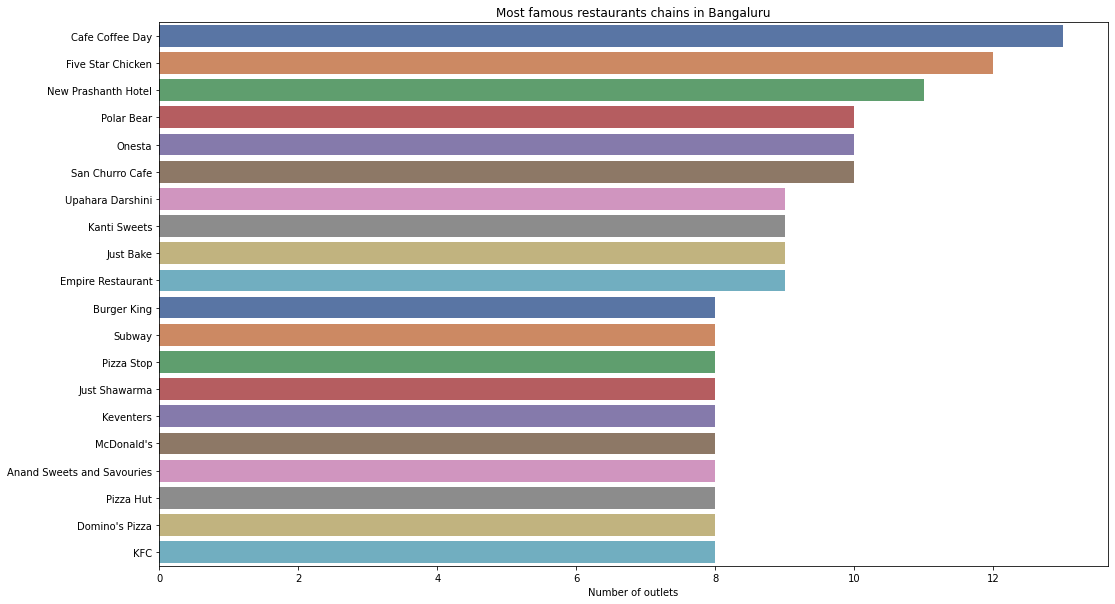

In [22]:
plt.figure(figsize=(17,10))
chains=zomato['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()

Whether restaurant offer Table booking or not

In [23]:
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.ticker as mtick

In [24]:
x=zomato['book_table'].value_counts()
colors = ['#800080', '#0000A0']

trace=go.Pie(labels=x.index,values=x,textinfo="value",
            marker=dict(colors=colors, 
                           line=dict(color='#001000', width=2)))
layout=go.Layout(title="Table booking",width=600,height=600)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

Insight

Most of the Restaurants do not offer table booking

Whether Restaurants deliver online or No

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



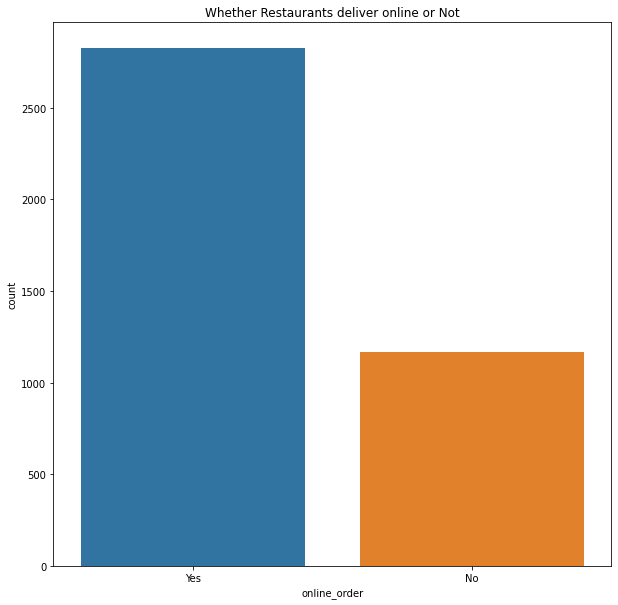

In [25]:

#Restaurants delivering Online or not
sns.countplot(zomato['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Whether Restaurants deliver online or Not')
plt.show()

Insight:

Most Restaurants offer option for online order and delivery

Rating Distributions

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



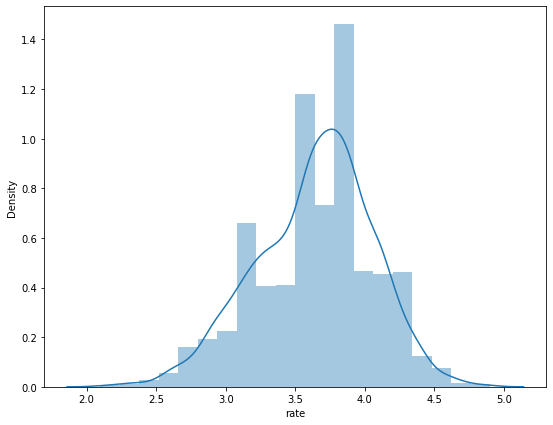

In [26]:
#How ratings are distributed
plt.figure(figsize=(9,7))

sns.distplot(zomato['rate'],bins=20)

Insight

We can infer from above that most of the ratings are within 3. and 4.4

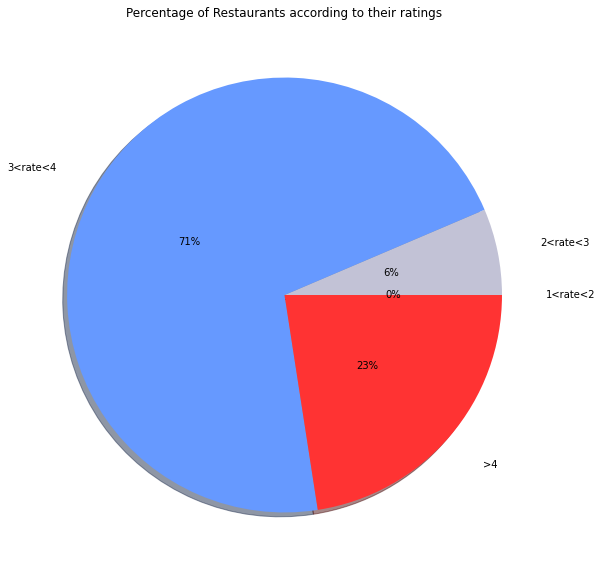

In [28]:
# Pie chart for rating
slices=[((zomato['rate']>=1) & (zomato['rate']<2)).sum(),
        ((zomato['rate']>=2) & (zomato['rate']<3)).sum(),
        ((zomato['rate']>=3) & (zomato['rate']<4)).sum(),
        (zomato['rate']>=4).sum()
        ]

labels=['1<rate<2','2<rate<3','3<rate<4','>4']
colors = ['#ff3333','#c2c2d6','#6699ff']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")

fig.set_size_inches(10,10)
plt.show()

Services Types

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Type of Service')

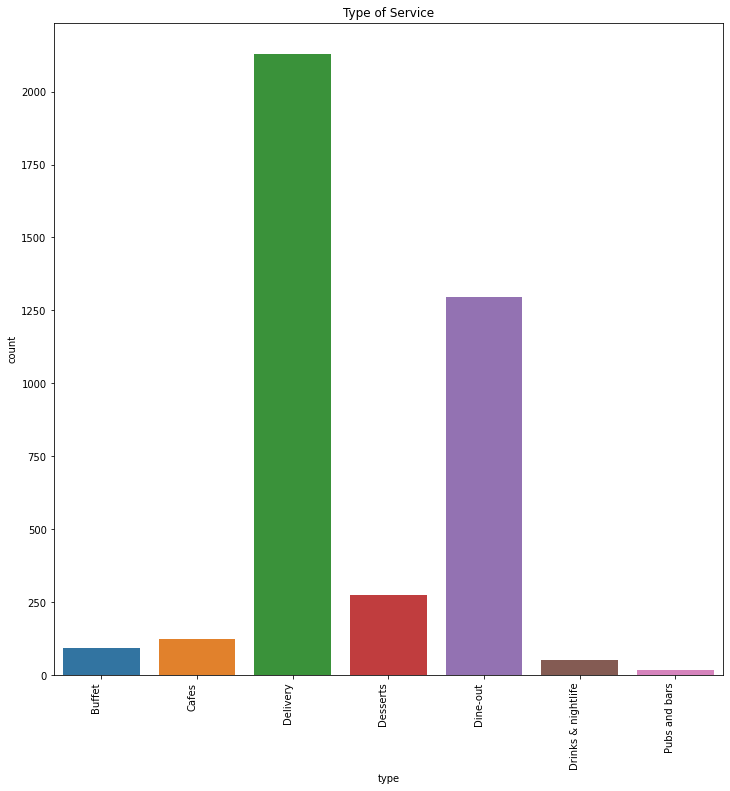

In [29]:
#Types of Services

sns.countplot(zomato['type']).set_xticklabels(sns.countplot(zomato['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Type of Service')

# Here the two main service types are Delivery and Dine-out

Distribution of Cost of Food for two People

In [30]:
trace0=go.Box(y=zomato['cost'],name="accepting online orders",
              marker = dict(
        color = 'rgb(113, 10, 100)',
    ))
data1=[trace0]
layout=go.Layout(title="Box plot of approximate cost",width=800,height=800,yaxis=dict(title="Price"))
fig=go.Figure(data=data1,layout=layout)
py.iplot(fig)


Distribution of charges

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



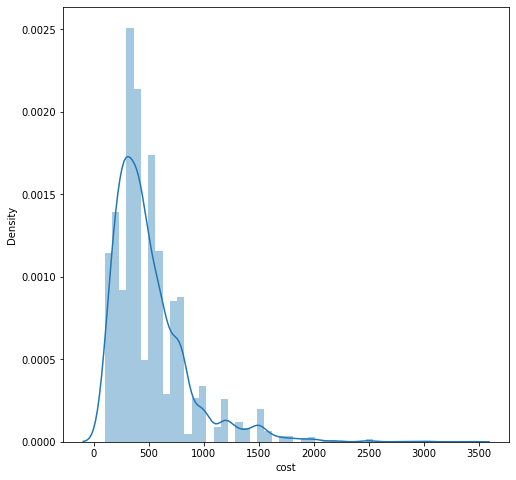

In [31]:

plt.figure(figsize=(8,8))
sns.distplot(zomato['cost'])
plt.show()

Restaurant and their counts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'count')

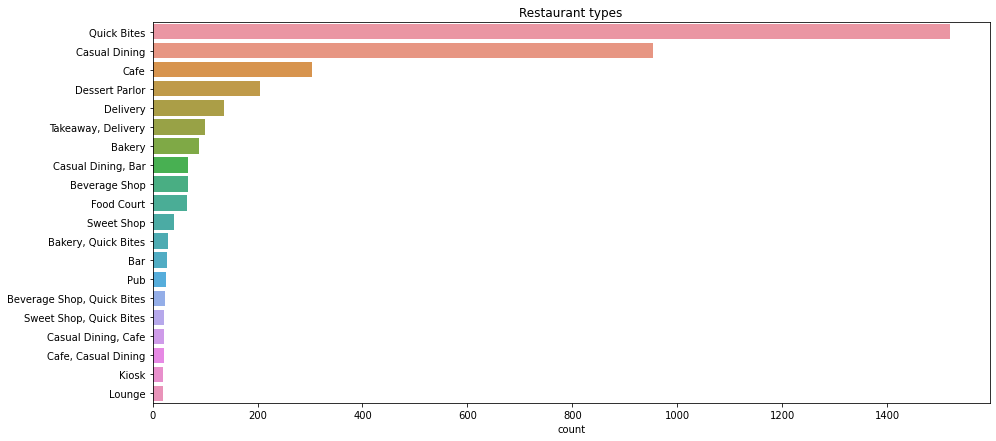

In [37]:

plt.figure(figsize=(15,7))
rest=zomato['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Restaurant types")
plt.xlabel("count")

Casual Dining, Quick Bites and Cafe are the 3 most common types of Restaurants in Banglore

In [38]:
zomato['name'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ...,
       'WelcomCafe Jacaranda - WelcomHotel Bengaluru',
       'Season - Adarsh Hamilton', 'Puran da Dhaba - The Pride Hotel'],
      dtype=object)

In [39]:
zomato['name'].nunique()

1865

In [40]:
# Compute the mean rating
restaurants=list(zomato['name'].unique())
zomato['Mean Rating']=0
for i in range(len(restaurants)):
    zomato['Mean Rating'][zomato['name']==restaurants[i]] = zomato['rate'][zomato['name']==restaurants[i]].mean()
zomato

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985,"Level 2, Concorde Block, UB City, Vittal Malya...",BBQ'D - Global Grill & Brewery,No,No,4.3,471,Lavelle Road,"Casual Dining, Microbrewery","BBQ, North Indian",1500.0,"[('Rated 4.0', 'RATED\n Yet another live barb...",[],Buffet,Brigade Road,4.3
3986,"The Ritz-Carlton, 99, Residency Road, Bangalore",The Market - The Ritz-Carlton,No,Yes,4.3,622,Residency Road,Fine Dining,"North Indian, European, Thai",3400.0,"[('Rated 4.0', 'RATED\n Had breakfast at the ...",[],Buffet,Brigade Road,4.3
3987,"WelcomHotel Bengaluru, 46, Richmond Road, Bang...",WelcomCafe Jacaranda - WelcomHotel Bengaluru,No,No,3.9,53,Richmond Road,Fine Dining,"Asian, Continental, North Indian",2000.0,"[('Rated 5.0', 'RATED\n Hey folks, its as bea...",[],Buffet,Brigade Road,3.9
3988,"2/4, Langford Garden Road, Richmond Road, Bang...",Season - Adarsh Hamilton,No,Yes,4.3,334,Richmond Road,Casual Dining,"North Indian, Chinese, South Indian, Continental",1200.0,"[('Rated 4.0', 'RATED\n This has been our go ...",[],Buffet,Brigade Road,4.3


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(1,5))
zomato['Mean Rating']=scaler.fit_transform(zomato[['Mean Rating']].round(2))
zomato

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3.814815
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3.814815
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.370370
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.222222
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.370370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985,"Level 2, Concorde Block, UB City, Vittal Malya...",BBQ'D - Global Grill & Brewery,No,No,4.3,471,Lavelle Road,"Casual Dining, Microbrewery","BBQ, North Indian",1500.0,"[('Rated 4.0', 'RATED\n Yet another live barb...",[],Buffet,Brigade Road,4.111111
3986,"The Ritz-Carlton, 99, Residency Road, Bangalore",The Market - The Ritz-Carlton,No,Yes,4.3,622,Residency Road,Fine Dining,"North Indian, European, Thai",3400.0,"[('Rated 4.0', 'RATED\n Had breakfast at the ...",[],Buffet,Brigade Road,4.111111
3987,"WelcomHotel Bengaluru, 46, Richmond Road, Bang...",WelcomCafe Jacaranda - WelcomHotel Bengaluru,No,No,3.9,53,Richmond Road,Fine Dining,"Asian, Continental, North Indian",2000.0,"[('Rated 5.0', 'RATED\n Hey folks, its as bea...",[],Buffet,Brigade Road,3.518519
3988,"2/4, Langford Garden Road, Richmond Road, Bang...",Season - Adarsh Hamilton,No,Yes,4.3,334,Richmond Road,Casual Dining,"North Indian, Chinese, South Indian, Continental",1200.0,"[('Rated 4.0', 'RATED\n This has been our go ...",[],Buffet,Brigade Road,4.111111


In [43]:
zomato['name'].nunique()

1865

#### Now the next step is to perform some text preprocessing steps which include:
1.	Lower casing
2.	Removal of Punctuations
3.	Removal of Stopwords
4.	Removal of URLs

Now let’s perform the above text preprocessing steps on the data:
 

In [44]:

# 1.lower casing
zomato["reviews_list"]=zomato["reviews_list"].str.lower()
zomato

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('rated 4.0', 'rated\n a beautiful place to ...",[],Buffet,Banashankari,3.814815
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('rated 4.0', 'rated\n had been here for din...",[],Buffet,Banashankari,3.814815
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('rated 3.0', ""rated\n ambience is not that ...",[],Buffet,Banashankari,3.370370
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('rated 4.0', ""rated\n great food and proper...",[],Buffet,Banashankari,3.222222
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('rated 4.0', 'rated\n very good restaurant ...",[],Buffet,Banashankari,3.370370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985,"Level 2, Concorde Block, UB City, Vittal Malya...",BBQ'D - Global Grill & Brewery,No,No,4.3,471,Lavelle Road,"Casual Dining, Microbrewery","BBQ, North Indian",1500.0,"[('rated 4.0', 'rated\n yet another live barb...",[],Buffet,Brigade Road,4.111111
3986,"The Ritz-Carlton, 99, Residency Road, Bangalore",The Market - The Ritz-Carlton,No,Yes,4.3,622,Residency Road,Fine Dining,"North Indian, European, Thai",3400.0,"[('rated 4.0', 'rated\n had breakfast at the ...",[],Buffet,Brigade Road,4.111111
3987,"WelcomHotel Bengaluru, 46, Richmond Road, Bang...",WelcomCafe Jacaranda - WelcomHotel Bengaluru,No,No,3.9,53,Richmond Road,Fine Dining,"Asian, Continental, North Indian",2000.0,"[('rated 5.0', 'rated\n hey folks, its as bea...",[],Buffet,Brigade Road,3.518519
3988,"2/4, Langford Garden Road, Richmond Road, Bang...",Season - Adarsh Hamilton,No,Yes,4.3,334,Richmond Road,Casual Dining,"North Indian, Chinese, South Indian, Continental",1200.0,"[('rated 4.0', 'rated\n this has been our go ...",[],Buffet,Brigade Road,4.111111


In [45]:
#2.Removal of Punctuations
import string 
punct_to_remove=string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuatin"""
    return text.translate(str.maketrans('','',punct_to_remove))


In [46]:
zomato=zomato.head(5000)

In [47]:
zomato["reviews_list"]=zomato["reviews_list"].apply(lambda text:remove_punctuation(text))
    

In [48]:
zomato

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,rated 40 ratedn a beautiful place to dine int...,[],Buffet,Banashankari,3.814815
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,rated 40 ratedn had been here for dinner with...,[],Buffet,Banashankari,3.814815
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,rated 30 ratedn ambience is not that good eno...,[],Buffet,Banashankari,3.370370
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,rated 40 ratedn great food and proper karnata...,[],Buffet,Banashankari,3.222222
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,rated 40 ratedn very good restaurant in neigh...,[],Buffet,Banashankari,3.370370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985,"Level 2, Concorde Block, UB City, Vittal Malya...",BBQ'D - Global Grill & Brewery,No,No,4.3,471,Lavelle Road,"Casual Dining, Microbrewery","BBQ, North Indian",1500.0,rated 40 ratedn yet another live barbecue pla...,[],Buffet,Brigade Road,4.111111
3986,"The Ritz-Carlton, 99, Residency Road, Bangalore",The Market - The Ritz-Carlton,No,Yes,4.3,622,Residency Road,Fine Dining,"North Indian, European, Thai",3400.0,rated 40 ratedn had breakfast at the market ...,[],Buffet,Brigade Road,4.111111
3987,"WelcomHotel Bengaluru, 46, Richmond Road, Bang...",WelcomCafe Jacaranda - WelcomHotel Bengaluru,No,No,3.9,53,Richmond Road,Fine Dining,"Asian, Continental, North Indian",2000.0,rated 50 ratedn hey folks its as beautiful as...,[],Buffet,Brigade Road,3.518519
3988,"2/4, Langford Garden Road, Richmond Road, Bang...",Season - Adarsh Hamilton,No,Yes,4.3,334,Richmond Road,Casual Dining,"North Indian, Chinese, South Indian, Continental",1200.0,rated 40 ratedn this has been our go to place...,[],Buffet,Brigade Road,4.111111


In [49]:
# 3.Removal of Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))

def remove_stopwords(text):
    """costom function to remove the stopwords"""
    return ' '.join([word for word in text.split() if word not in stopword])
zomato["reviews_list"]=zomato["reviews_list"].apply(lambda text:remove_stopwords(text))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [50]:
zomato

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,[],Buffet,Banashankari,3.814815
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,rated 40 ratedn dinner family turned good choo...,[],Buffet,Banashankari,3.814815
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,rated 30 ratedn ambience good enough pocket fr...,[],Buffet,Banashankari,3.370370
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,rated 40 ratedn great food proper karnataka st...,[],Buffet,Banashankari,3.222222
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,rated 40 ratedn good restaurant neighbourhood ...,[],Buffet,Banashankari,3.370370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985,"Level 2, Concorde Block, UB City, Vittal Malya...",BBQ'D - Global Grill & Brewery,No,No,4.3,471,Lavelle Road,"Casual Dining, Microbrewery","BBQ, North Indian",1500.0,rated 40 ratedn yet another live barbecue plac...,[],Buffet,Brigade Road,4.111111
3986,"The Ritz-Carlton, 99, Residency Road, Bangalore",The Market - The Ritz-Carlton,No,Yes,4.3,622,Residency Road,Fine Dining,"North Indian, European, Thai",3400.0,rated 40 ratedn breakfast market decent place ...,[],Buffet,Brigade Road,4.111111
3987,"WelcomHotel Bengaluru, 46, Richmond Road, Bang...",WelcomCafe Jacaranda - WelcomHotel Bengaluru,No,No,3.9,53,Richmond Road,Fine Dining,"Asian, Continental, North Indian",2000.0,rated 50 ratedn hey folks beautiful name let s...,[],Buffet,Brigade Road,3.518519
3988,"2/4, Langford Garden Road, Richmond Road, Bang...",Season - Adarsh Hamilton,No,Yes,4.3,334,Richmond Road,Casual Dining,"North Indian, Chinese, South Indian, Continental",1200.0,rated 40 ratedn go place lunch meeting dinner ...,[],Buffet,Brigade Road,4.111111


In [52]:
# 4.Removal of URLs
import re
def remove_urls(text):
    url_pattern=re.compile(r'https?://\s+|www\.\S+')
    return url_pattern.sub(r'',text)
zomato["reviews_list"]=zomato["reviews_list"].apply(lambda text:remove_urls(text))
zomato[["reviews_list","cuisines"]]

,reviews_list,cuisines
0,rated 40 ratedn beautiful place dine inthe int...,"North Indian, Mughlai, Chinese"
1,rated 40 ratedn dinner family turned good choo...,"Chinese, North Indian, Thai"
2,rated 30 ratedn ambience good enough pocket fr...,"Cafe, Mexican, Italian"
3,rated 40 ratedn great food proper karnataka st...,"South Indian, North Indian"
4,rated 40 ratedn good restaurant neighbourhood ...,"North Indian, Rajasthani"
...,...,...
3985,rated 40 ratedn yet another live barbecue plac...,"BBQ, North Indian"
3986,rated 40 ratedn breakfast market decent place ...,"North Indian, European, Thai"
3987,rated 50 ratedn hey folks beautiful name let s...,"Asian, Continental, North Indian"
3988,rated 40 ratedn go place lunch meeting dinner ...,"North Indian, Chinese, South Indian, Continental"


In [53]:
zomato["reviews_list"][0]

'rated 40 ratedn beautiful place dine inthe interiors take back mughal era lightings perfectwe went occasion christmas limited items available taste service compromised allthe complaint breads could betterwould surely like come rated 40 ratedn dinner family weekday restaurant completely empty ambience good good old hindi music seating arrangement good ordered masala papad panner baby corn starters lemon corrionder soup butter roti olive chilli paratha food fresh good service good good family hangoutncheers rated 20 ratedn restaurant near banashankari bda along office friends visited buffet unfortunately provide veg buffet inquiring said place mostly visited vegetarians anyways ordered ala carte items took ages come food ok ok definitely visiting anymore rated 40 ratedn went weekend one us buffet two us took ala carte firstly ambience service place great buffet lot items good good pumpkin halwa intm dessert amazing must try kulchas great cheers rated 50 ratedn best thing place itã\x83x8

In [54]:
# Restaurant names
from sklearn.feature_extraction.text import CountVectorizer
restaurant_name=list(zomato['name'].unique())
def get_top_words(column,top_nu_of_words,nu_of_word):
    vec=CountVectorizer(ngram_range=nu_of_word,stop_words="english")
    bag_of_words=vec.fit_transform(column)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word ,idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
    return words_freq[:top_nu_of_words]
zomato=zomato.drop(['address','rest_type','type','menu_item','votes'],axis=1)


**TF-IDF Vectorization**

TF-IDF (Term Frequency-Inverse Document Frequency) vectors for each document. This will give you a matrix where each column represents a word in the general vocabulary (all words that appear in at least one document) and each column represents a restaurant, as before.
TF-IDF is the statistical method of assessing the meaning of a word in a given document. Now, I will use the TF-IDF vectorization on the dataset:


In [55]:
# TF-IDF Vectorization
zomato.set_index('name',inplace=True)

In [56]:
indices=pd.Series(zomato.index)
zomato

,online_order,book_table,rate,location,cuisines,cost,reviews_list,city,Mean Rating
name,,,,,,,,,
Jalsa,Yes,Yes,4.1,Banashankari,"North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,Banashankari,3.814815
Spice Elephant,Yes,No,4.1,Banashankari,"Chinese, North Indian, Thai",800.0,rated 40 ratedn dinner family turned good choo...,Banashankari,3.814815
San Churro Cafe,Yes,No,3.8,Banashankari,"Cafe, Mexican, Italian",800.0,rated 30 ratedn ambience good enough pocket fr...,Banashankari,3.370370
Addhuri Udupi Bhojana,No,No,3.7,Banashankari,"South Indian, North Indian",300.0,rated 40 ratedn great food proper karnataka st...,Banashankari,3.222222
Grand Village,No,No,3.8,Basavanagudi,"North Indian, Rajasthani",600.0,rated 40 ratedn good restaurant neighbourhood ...,Banashankari,3.370370
...,...,...,...,...,...,...,...,...,...
BBQ'D - Global Grill & Brewery,No,No,4.3,Lavelle Road,"BBQ, North Indian",1500.0,rated 40 ratedn yet another live barbecue plac...,Brigade Road,4.111111
The Market - The Ritz-Carlton,No,Yes,4.3,Residency Road,"North Indian, European, Thai",3400.0,rated 40 ratedn breakfast market decent place ...,Brigade Road,4.111111
WelcomCafe Jacaranda - WelcomHotel Bengaluru,No,No,3.9,Richmond Road,"Asian, Continental, North Indian",2000.0,rated 50 ratedn hey folks beautiful name let s...,Brigade Road,3.518519


In [57]:
# !pip install tfidf
# Creating tf-idf matrix
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(analyzer='word',ngram_range=(1,2),min_df=0,stop_words='english')
tfidf_matrix=tfidf.fit_transform(zomato['reviews_list'])

cosine_similarities=linear_kernel(tfidf_matrix,tfidf_matrix)

In [58]:
tfidf_matrix

<3990x423279 sparse matrix of type '<class 'numpy.float64'>'
	with 1900771 stored elements in Compressed Sparse Row format>

In [59]:
cosine_similarities

array([[1.        , 0.10061795, 0.08132249, ..., 0.02440635, 0.0309723 ,
        0.03931158],
       [0.10061795, 1.        , 0.09614793, ..., 0.03191464, 0.05502965,
        0.05126646],
       [0.08132249, 0.09614793, 1.        , ..., 0.01807323, 0.02626533,
        0.0322052 ],
       ...,
       [0.02440635, 0.03191464, 0.01807323, ..., 1.        , 0.02429805,
        0.0204842 ],
       [0.0309723 , 0.05502965, 0.02626533, ..., 0.02429805, 1.        ,
        0.02437181],
       [0.03931158, 0.05126646, 0.0322052 , ..., 0.0204842 , 0.02437181,
        1.        ]])

#### Now the last step for creating a Restaurant Recommendation System is to write a function that will recommend restaurants:

In [60]:
def recommend(name, cosine_similarities = cosine_similarities):   
    # Create a list to put top restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(zomato.index)[each])
        
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines', 'Mean Rating', 'cost'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(zomato[['cuisines','Mean Rating', 'cost']][zomato.index == each].sample()))
        
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines','Mean Rating', 'cost'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))
 
    return df_new




In [61]:
recommend('Penthouse Cafe')

TOP 10 RESTAURANTS LIKE Penthouse Cafe WITH SIMILAR REVIEWS: 


,cuisines,Mean Rating,cost
Byg Brewski Brewing Company,"Continental, North Indian, Italian, South Indi...",5.000000,1600.0
Foxtrot,"North Indian, Chinese, Continental, Momos",4.259259,1200.0
Tea Villa Cafe,"Cafe, Continental, Mediterranean, Italian, Des...",4.111111,800.0
THE RIG,"Continental, Finger Food, Pizza",4.111111,1500.0
Once Upon a Rooftop,"Pizza, Italian, Chinese, Thai",4.111111,1000.0
Alchemy Coffee Roasters,Cafe,3.962963,500.0
Vinny's,"Pizza, Italian, Continental, Desserts",3.962963,800.0
Mug N Bean,"Cafe, Continental, Italian, Burger",3.518519,400.0
Domino's Pizza,"Pizza, Fast Food",3.088889,800.0
Crunch Pizzas,"Italian, Pizza",1.518519,600.0
